In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/Users/hp/PycharmProjects/Heart-Disease-Classification1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\forest.pkl
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\heart_2020_cleaned.csv
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\heart_disease_classification.ipynb
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\main.py
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\README.md
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\requirements.txt
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\config
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\description
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\HEAD
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\index
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\packed-refs
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\hooks\applypatch-msg.sample
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\.git\hooks\commit-msg.sample
C:/Users/hp/P

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\saved_model\__pycache__\__init__.cpython-39.pyc
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\sets\__init__.py
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\sets\__pycache__\__init__.cpython-39.pyc
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\signal\__init__.py
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\signal\__pycache__\__init__.cpython-39.pyc
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\sparse\__init__.py
C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\venv\Lib\site-packages\tensorflow\_api\v2\compat\v1\sparse\__pycache__\__init__.cpython-39.pyc


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/hp/PycharmProjects/Heart-Disease-Classification1\heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [6]:
df.dtypes

HeartDisease         string
BMI                 float64
Smoking              string
AlcoholDrinking      string
Stroke               string
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          string
Sex                  string
AgeCategory          string
Race                 string
Diabetic             string
PhysicalActivity     string
GenHealth            string
SleepTime           float64
Asthma               string
KidneyDisease        string
SkinCancer           string
dtype: object

In [7]:
# getting the categorical columns to the list
string_col=df.select_dtypes("string").columns.to_list()

In [8]:
string_col

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [11]:
df.describe(include = "string").T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [12]:
#checking for missing values:

df.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [13]:
print("HeartDisease:",df['HeartDisease'].unique())
print("Smoking:",df['Smoking'].unique())
print("AlcoholDrinking:",df['AlcoholDrinking'].unique())
print("Stroke:",df['Stroke'].unique())
print("DiffWalking:",df['DiffWalking'].unique())
print("Sex:",df['Sex'].unique())
print("AgeCategory:",df['AgeCategory'].unique())
print("Race:",df['Race'].unique())
print("Diabetic:",df['Diabetic'].unique())
print("PhysicalActivity:",df['PhysicalActivity'].unique())
print("GenHealth:",df['GenHealth'].unique())
print("Asthma:",df['Asthma'].unique())
print("KidneyDisease:",df['KidneyDisease'].unique())
print("SkinCancer:",df['SkinCancer'].unique())

HeartDisease: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
Smoking: <StringArray>
['Yes', 'No']
Length: 2, dtype: string
AlcoholDrinking: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
Stroke: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
DiffWalking: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
Sex: <StringArray>
['Female', 'Male']
Length: 2, dtype: string
AgeCategory: <StringArray>
[      '55-59', '80 or older',       '65-69',       '75-79',       '40-44',
       '70-74',       '60-64',       '50-54',       '45-49',       '18-24',
       '35-39',       '30-34',       '25-29']
Length: 13, dtype: string
Race: <StringArray>
[                         'White',                          'Black',
                          'Asian', 'American Indian/Alaskan Native',
                          'Other',                       'Hispanic']
Length: 6, dtype: string
Diabetic: <StringArray>
['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)']
Length: 4, dtype:

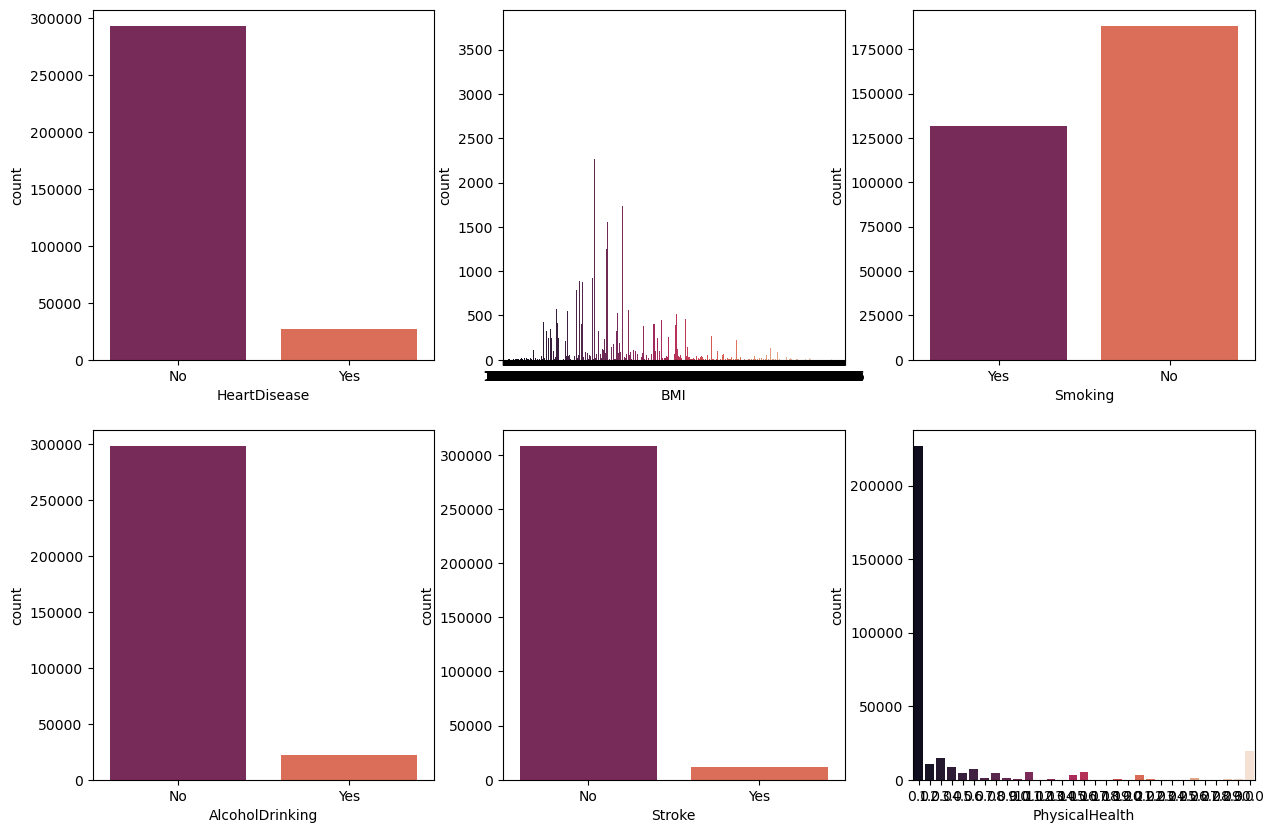

In [14]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x = df['HeartDisease'], data = df, palette='rocket', ax=axes[0,0])
sns.countplot(x = df['BMI'], data = df, palette='rocket', ax=axes[0,1])
sns.countplot(x = df['Smoking'], data = df, palette='rocket', ax=axes[0,2])

sns.countplot(x = df['AlcoholDrinking'], data = df, palette='rocket', ax=axes[1,0])
sns.countplot(x = df['Stroke'], data = df, palette='rocket', ax=axes[1,1])
sns.countplot(x = df['PhysicalHealth'], data = df, palette='rocket', ax=axes[1,2])
plt.show()

<Figure size 1500x1000 with 0 Axes>

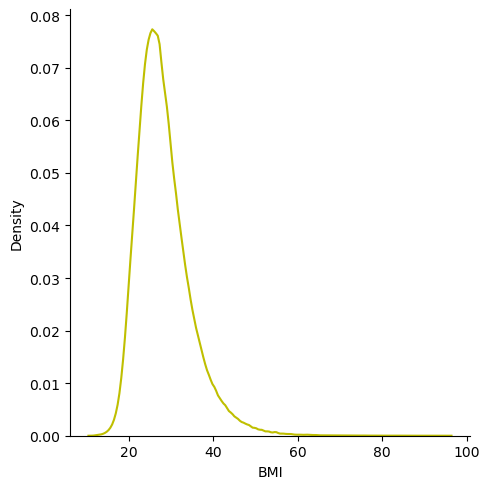

In [15]:
plt.figure(figsize = (15, 10))
sns.displot(df['BMI'], color = 'y', kind='kde')

plt.show()

<Figure size 2000x1000 with 0 Axes>

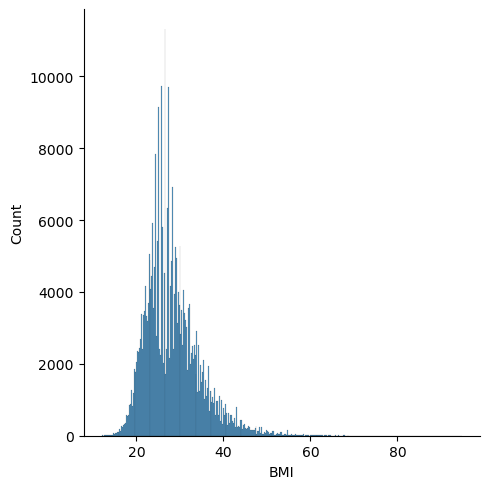

In [16]:
plt.figure(figsize = (20, 10))
sns.displot(df['BMI'])

plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['HeartDisease']=le.fit_transform(df['HeartDisease'])
df['Smoking']=le.fit_transform(df['Smoking'])
df['AlcoholDrinking']=le.fit_transform(df['AlcoholDrinking'])
df['Stroke']=le.fit_transform(df['Stroke'])
df['DiffWalking']=le.fit_transform(df['DiffWalking'])
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['PhysicalActivity']=le.fit_transform(df['PhysicalActivity'])
df['GenHealth']=le.fit_transform(df['GenHealth'])
df['Asthma']=le.fit_transform(df['Asthma'])
df['KidneyDisease']=le.fit_transform(df['KidneyDisease'])
df['SkinCancer']=le.fit_transform(df['SkinCancer'])


df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<AxesSubplot:>

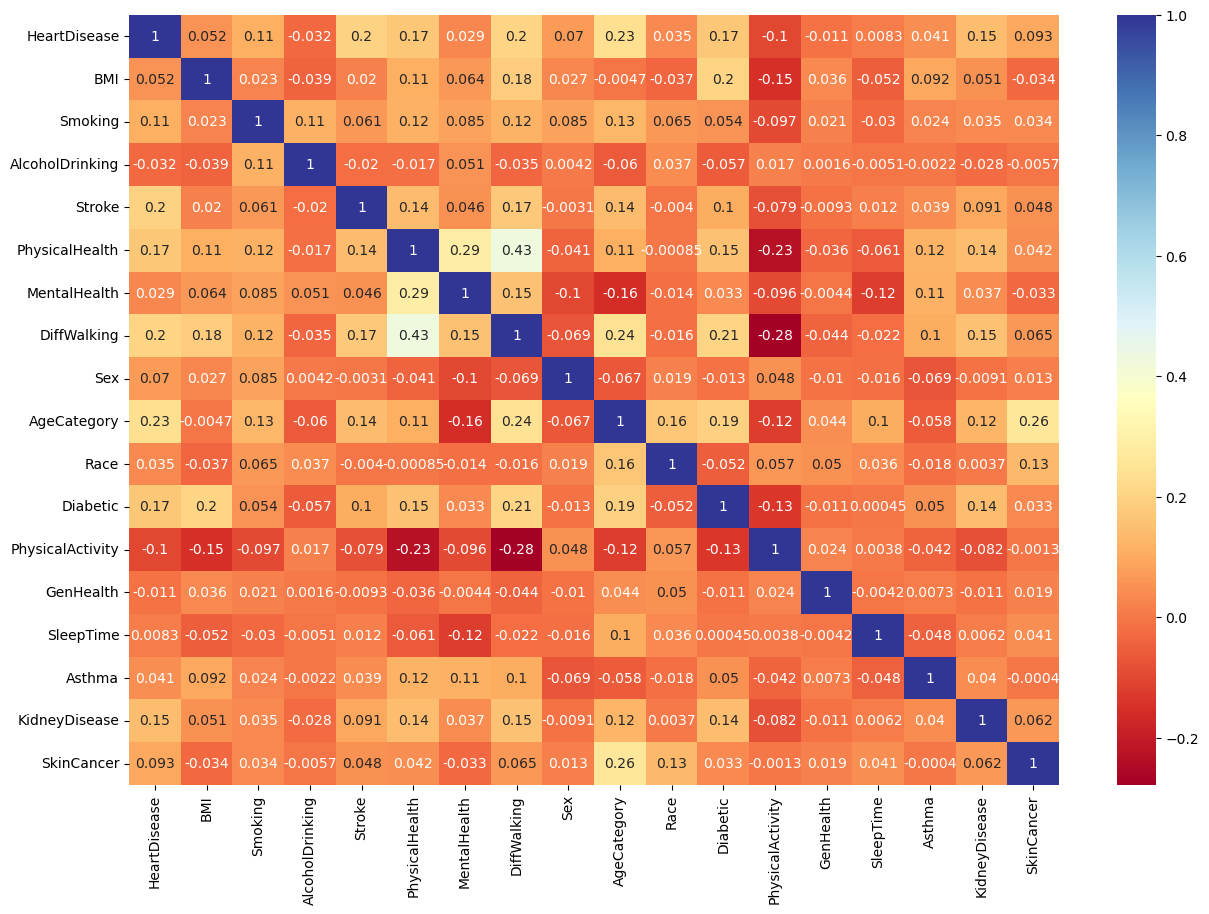

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

In [19]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [21]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (255836, 17)
X_test:  (63959, 17)
y_train:  (255836,)
y_test:  (63959,)


In [22]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=0)
model = abc.fit(X_train, y_train)

In [23]:
y_pred_adaboost = model.predict(X_test)
print(y_pred_adaboost)

[0 0 0 ... 0 0 0]


In [24]:
from sklearn.metrics import accuracy_score

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Classifier Model Accuracy: 0.9147266217420535


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=0)
model = gbc.fit(X_train, y_train)

In [26]:
y_pred_xgboost = model.predict(X_test)
print(y_pred_xgboost)

[0 0 0 ... 0 0 0]


In [27]:
from sklearn.metrics import accuracy_score

print("XGBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_xgboost))

XGBoost Classifier Model Accuracy: 0.9158210728748104


In [85]:
from sklearn.linear_model import LogisticRegression
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

print(y_train.mean())
print(y_test.mean())

0.08583291350346577
0.08345841150719199


In [86]:
Classifier_1 = LogisticRegression(max_iter=300)

Classifier_1.fit(X_train, y_train)

Predictions_1 = Classifier_1.predict(X_test)

Accuracy Score of Logitic Regression :  0.9187929956222639
Precision Score:  0.5759493670886076
Recall Score:  0.10228550018733608
F1 Score: 0.17371937639198218


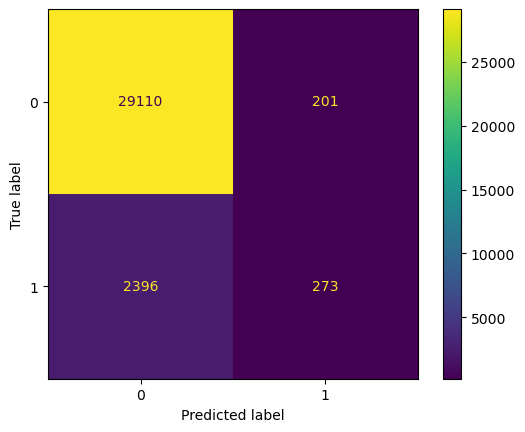

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
Confusion = confusion_matrix(y_test, Predictions_1)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion)
Display.plot()

print('Accuracy Score of Logitic Regression : ', accuracy_score(y_test, Predictions_1))
print('Precision Score: ', precision_score(y_test, Predictions_1))
print('Recall Score: ', recall_score(y_test, Predictions_1))
print('F1 Score:',f1_score(y_test,Predictions_1))

In [36]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)
train, test = train_test_split(df,stratify=df['HeartDisease'],test_size=.2,random_state=0)

In [37]:
def outlier(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 3.0)]
    
    return df

In [38]:
def outlier_2(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 1.9)]
    
    return df

In [39]:
def outlier_3(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 1.2)]
    
    return df

In [40]:
print(train.shape)
train = outlier(train, ['SleepTime'])
print(train.shape)
train = outlier_2(train, ['BMI'])
print(train.shape)
train = outlier_3(train, ['PhysicalHealth'])
print(train.shape)
train = outlier_3(train, ['MentalHealth'])
print(train.shape)

(255836, 18)
(252209, 18)
(239853, 18)
(216503, 18)
(196479, 18)


In [41]:
print(test.shape)
test = outlier(test, ['SleepTime'])
print(test.shape)
test = outlier_2(test, ['BMI'])
print(test.shape)
test = outlier_3(test, ['PhysicalHealth'])
print(test.shape)
test = outlier_3(test, ['MentalHealth'])
print(test.shape)
(63959, 18)

(63959, 18)
(63043, 18)
(59793, 18)
(54007, 18)
(48968, 18)


(63959, 18)

In [42]:
train['Physical_MentalHealth'] = train['PhysicalHealth'] + train['MentalHealth']
test['Physical_MentalHealth'] = test['PhysicalHealth'] + test['MentalHealth']
train['PhysicalHealth_log'] = np.log1p(train['PhysicalHealth'])   #Take the logarithm after adding 1
train['MentalHealth_log'] = np.log1p(train['MentalHealth'])
test['PhysicalHealth_log'] = np.log1p(test['PhysicalHealth'])
test['MentalHealth_log'] = np.log1p(test['MentalHealth'])

In [43]:
y_train = train['HeartDisease']
X_train = train.drop('HeartDisease',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=train['HeartDisease'], test_size=.2, random_state=1205)

y_test = test['HeartDisease']
X_test = test.drop('HeartDisease', axis=1)

In [96]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results
1
y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Accuracy of Random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy of Random Forest : 0.9095


In [58]:
from sklearn.ensemble import VotingClassifier
Ada_clf = AdaBoostClassifier()
XG_clf = GradientBoostingClassifier()
LR_clf= LogisticRegression(max_iter=500)
RF_clf= RandomForestClassifier()


Ada_clf.fit(X_train, y_train)
XG_clf.fit(X_train, y_train)
LR_clf.fit(X_train, y_train)
RF_clf.fit(X_train, y_train)


Ada_pred = Ada_clf.predict(X_test)
XG_pred = XG_clf.predict(X_test)
LR_pred = LR_clf.predict(X_test)
RF_pred = RF_clf.predict(X_test)

averaged_preds = (Ada_pred+XG_pred+LR_pred+RF_pred)//4
acc = accuracy_score(y_test, averaged_preds)
print(acc)



voting_clf = VotingClassifier(estimators=[('Ada', Ada_clf), ('XG',XG_clf),('LR',LR_clf),('RF',RF_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
print("Accuracy is: " + str(acc))

0.9301176278385884
Accuracy is: 0.9308936448292763
